In [3]:
import pandas as pd
import numpy as np
import surprise
import os

In [2]:
books_df = pd.DataFrame()

for i in range(100,2000,100):
    path = os.path.join('G:/BIG DATA/Recommender System Udacity/books 2', f'book{i}k-{i+100}k.csv')
    print(path)
    books_df = books_df.append(pd.read_csv(path))
    
path = os.path.join('G:/BIG DATA/Recommender System Udacity/books 2', f'book1-100k.csv')   
books_df = books_df.append(pd.read_csv(path))


for i in range(2000,5000,1000):
    path = os.path.join('G:/BIG DATA/Recommender System Udacity/books 2', f'book{i}k-{i+1000}k.csv')
    print(path)
    books_df = books_df.append(pd.read_csv(path))

G:/BIG DATA/Recommender System Udacity/books 2\book100k-200k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book200k-300k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book300k-400k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book400k-500k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book500k-600k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book600k-700k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book700k-800k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book800k-900k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book900k-1000k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book1000k-1100k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book1100k-1200k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book1200k-1300k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book1300k-1400k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book1400k-1500k.csv
G:/BIG DATA/Recommender System Udacity/books 2\book1500k-1600k.csv
G:/BIG DATA/

In [25]:
books_df['page_number'] = books_df.apply(lambda x: 
                                         x['pagesNumber'] if (~pd.isnull(x['pagesNumber'])) else x['PagesNumber'],axis=1)

<ipython-input-25-eee085b954c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_df['page_number'] = books_df.apply(lambda x:


In [26]:
books_df.head(10)

,Unnamed: 0,pagesNumber,Authors,Publisher,Rating,Language,RatingDistTotal,RatingDist5,RatingDist3,CountsOfReview,...,PublishMonth,Id,PublishYear,RatingDist1,RatingDist2,Name,Description,Count of text reviews,PagesNumber,page_number
0,0,400.0,Royce Flippin,PublicAffairs,4.18,NaN,total:11,5:3,3:1,1,...,20,100000,2004,1:0,2:0,The Best American Political Writing 2004: Spec...,NaN,NaN,NaN,400.0
1,1,30.0,Gail Sakurai,Turtleback Books,4.00,NaN,total:6,5:2,3:2,0,...,1,100004,1996,1:0,2:0,Stephen Hawking: Understanding the Universe,NaN,NaN,NaN,30.0
2,2,16.0,Sandi Hill,Creative Teaching Press,3.60,NaN,total:5,5:0,3:2,2,...,1,100007,1998,1:0,2:0,Detective Dog and the Search for Cat,NaN,NaN,NaN,16.0
3,3,280.0,Bob Butz,Lyons Press,3.21,NaN,total:29,5:3,3:12,6,...,1,100010,2005,1:2,2:4,"Beast of Never, Cat of God: The Search for the...",NaN,NaN,NaN,280.0
4,4,193.0,Raymond B. Marcin,Catholic University of America Press,3.43,NaN,total:7,5:0,3:2,0,...,3,100011,2006,1:0,2:1,In Search of Schopenhauer's Cat: Arthur Schope...,NaN,NaN,NaN,193.0
5,5,168.0,Sue Hamilton,"Oxford University Press, USA",3.52,en-GB,total:313,5:42,3:111,33,...,7,100016,2001,1:4,2:34,Indian Philosophy: A Very Short Introduction,NaN,NaN,NaN,168.0
6,6,149.0,Simon Critchley,"Oxford University Press, USA",3.70,NaN,total:677,5:149,3:230,62,...,7,100017,2001,1:9,2:48,Continental Philosophy: A Very Short Introduction,NaN,NaN,NaN,149.0
7,7,133.0,Julia Annas,"Oxford University Press, USA",3.54,eng,total:401,5:63,3:140,46,...,18,100019,2001,1:8,2:42,Ancient Philosophy: A Very Short Introduction,NaN,NaN,NaN,133.0
8,8,127.0,Raymond Wacks,"Oxford University Press, USA",3.67,NaN,total:354,5:74,3:117,26,...,22,100020,2006,1:5,2:30,Philosophy of Law: A Very Short Introduction,NaN,NaN,NaN,127.0
9,9,112.0,Thomas Nagel,"Oxford University Press, USA",3.65,en-US,total:2758,5:545,3:899,177,...,15,100021,1987,1:49,2:230,What Does It All Mean? A Very Short Introducti...,NaN,NaN,NaN,112.0


In [27]:
books_df.drop('Unnamed: 0', axis=1, errors='ignore').to_csv('books_info.csv')

## Load from here books_df

In [4]:
books_df = pd.read_csv('books_info.csv', index_col=0)

C:\Users\mperp\anaconda3\envs\bbva-env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\mperp\anaconda3\envs\bbva-env\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
books_df.Language.count()

208324

In [6]:
books_df.columns

Index(['pagesNumber', 'Authors', 'Publisher', 'Rating', 'Language',
       'RatingDistTotal', 'RatingDist5', 'RatingDist3', 'CountsOfReview',
       'PublishDay', 'ISBN', 'RatingDist4', 'PublishMonth', 'Id',
       'PublishYear', 'RatingDist1', 'RatingDist2', 'Name', 'Description',
       'Count of text reviews', 'PagesNumber', 'page_number'],
      dtype='object')

In [13]:
books_df.Name.nunique()

1636235

In [14]:
books_df.Id.nunique()

1850115

In [35]:
books_df[books_df.Name.str.contains('Ready')]

,pagesNumber,Authors,Publisher,Rating,Language,RatingDistTotal,RatingDist5,RatingDist3,CountsOfReview,PublishDay,...,PublishMonth,Id,PublishYear,RatingDist1,RatingDist2,Name,Description,Count of text reviews,PagesNumber,page_number
690,200.0,Lavonne McKee,New Horizon Press,3.50,NaN,total:6,5:2,3:2,1,1,...,15,101145,1994,1:1,2:0,Get Ready to Say Goodbye,NaN,NaN,NaN,200.0
4119,192.0,Arrol Gellner,Studio,4.25,NaN,total:16,5:6,3:2,1,9,...,29,106795,2003,1:0,2:0,Ready to Roll: A Celebration of the Classic Am...,NaN,NaN,NaN,192.0
4825,128.0,Elissa Stein,Chronicle Books,4.19,NaN,total:16,5:10,3:3,5,7,...,22,107942,2004,1:0,2:2,Cheerleader: Ready? Okay!,NaN,NaN,NaN,128.0
5455,96.0,Abby Klein,The Blue Sky Press,3.96,eng,total:163,5:73,3:38,15,1,...,1,108890,2007,1:7,2:10,"Super-Secret Valentine (Ready, Freddy!, #10)",NaN,NaN,NaN,96.0
5456,96.0,Abby Klein,The Blue Sky Press,4.05,eng,total:260,5:124,3:52,8,10,...,1,108892,2006,1:10,2:14,"Shark Tooth Tale (Ready, Freddy!, #9)",NaN,NaN,NaN,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844958,NaN,Candace J. Hamner,Opus Communications,0.00,NaN,total:0,5:0,3:0,0,1,...,1,4828385,1998,1:0,2:0,"Ready, Set, Jcaho!",NaN,NaN,272.0,NaN
1845021,NaN,Garry Davis,World Government House,0.00,NaN,total:0,5:0,3:0,0,31,...,10,4828554,2003,1:0,2:0,"World Government, Ready or Not!","WORLD GOVERNMENT, READY OR NOT! is the first h...",NaN,404.0,NaN
1845455,NaN,Carol A. Josel,Center for Applied Research in Education,3.50,NaN,total:4,5:0,3:0,0,1,...,3,4830103,1994,1:0,2:1,Ready To Use Esl Activities For Every Month Of...,NaN,NaN,312.0,NaN
1848231,NaN,Robert J. Dean,B&H Publishing Group,0.00,NaN,total:0,5:0,3:0,0,23,...,3,4838706,1998,1:0,2:0,14 Ready to Teach Bible Study Lessons,NaN,NaN,112.0,NaN


<AxesSubplot:>

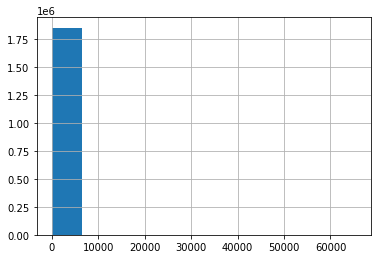

In [28]:
books_df.PublishYear.hist()

In [6]:
user_df = pd.DataFrame()
import os
for i in range(0,6000,1000):
    path = os.path.join('G:/BIG DATA/Recommender System Udacity/books 2', 
                        f'user_rating_{i}_to_{i+1000}.csv')
    print(path)
    user_df = user_df.append(pd.read_csv(path))
    print(len(user_df))
    

    
path = os.path.join('G:/BIG DATA/Recommender System Udacity/books 2', 
                        f'user_rating_6000_to_11000.csv')
print(path)
user_df = user_df.append(pd.read_csv(path))

G:/BIG DATA/Recommender System Udacity/books 2\user_rating_0_to_1000.csv
51945
G:/BIG DATA/Recommender System Udacity/books 2\user_rating_1000_to_2000.csv
94931
G:/BIG DATA/Recommender System Udacity/books 2\user_rating_2000_to_3000.csv
125564
G:/BIG DATA/Recommender System Udacity/books 2\user_rating_3000_to_4000.csv
172534
G:/BIG DATA/Recommender System Udacity/books 2\user_rating_4000_to_5000.csv
219437
G:/BIG DATA/Recommender System Udacity/books 2\user_rating_5000_to_6000.csv
234918
G:/BIG DATA/Recommender System Udacity/books 2\user_rating_6000_to_11000.csv


In [7]:
user_df.to_csv('ratings.csv')

## Load from here user_df

In [9]:
import pandas as pd

In [10]:
user_df = pd.read_csv('ratings.csv', index_col=0)

In [11]:
len(user_df)

362596

In [12]:
print(user_df.Name.nunique())
print(user_df.ID.nunique())
print(user_df.Rating.unique())

103533
8919
['it was amazing' 'really liked it' 'liked it' 'did not like it'
 'it was ok' "This user doesn't have any rating"]


In [13]:
n_items = user_df.Name.nunique()

In [14]:


rating_map = {"This user doesn't have any rating": 0,
              "did not like it": 1, 
              "it was ok": 2, 
              "liked it": 3, 
              "really liked it":4, 
              "it was amazing" : 5}

user_df['Rating'] = user_df['Rating'].map(rating_map)

In [15]:
user_df = user_df[user_df['Rating']!=0]

In [16]:
user_df.Name.nunique()

103532

In [17]:
user_df.ID.nunique()

4154

In [31]:
len(user_df)

357831

## EDA

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

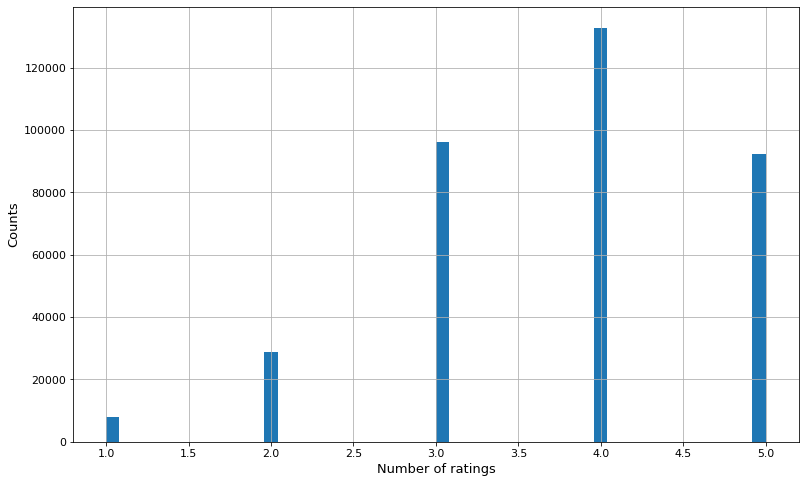

In [41]:
import matplotlib.pyplot as plt
user_df.ratings.hist(bins=50, figsize=(13, 8))
plt.xlabel('Number of ratings', size=13)
plt.ylabel('Counts', size=13)
plt.xticks(size=11)
plt.yticks(size=11)

[]

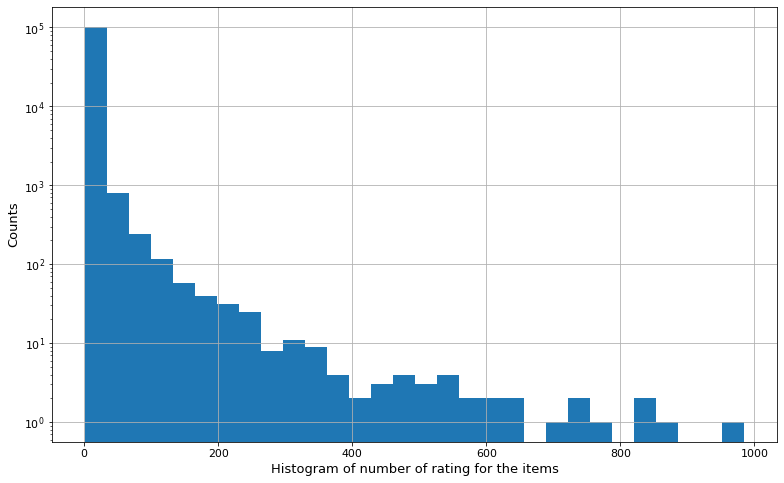

In [65]:
user_df.groupby('item_des').count()['ratings'].hist(bins=30, figsize=(13, 8))
plt.xlabel('Histogram of number of ratings for the items', size=13)
plt.ylabel('Counts', size=13)
plt.xticks(size=11)
plt.yticks(size=11)
plt.semilogy()

[]

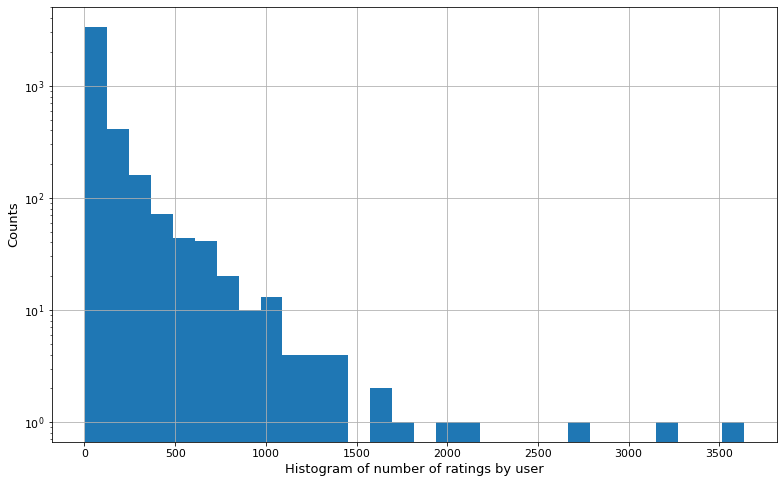

In [66]:
user_df.groupby('user_id').count()['ratings'].hist(bins=30, figsize=(13, 8))
plt.xlabel('Histogram of number of ratings by user', size=13)
plt.ylabel('Counts', size=13)
plt.xticks(size=11)
plt.yticks(size=11)
plt.semilogy()

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

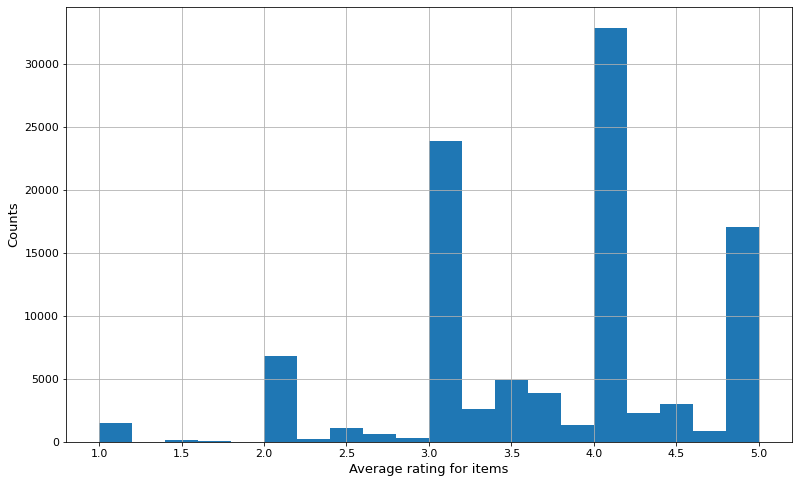

In [48]:
user_df.groupby('item_des').mean()['ratings'].hist(bins=20, figsize=(13, 8))
plt.xlabel('Average rating for items', size=13)
plt.ylabel('Counts', size=13)
plt.xticks(size=11)
plt.yticks(size=11)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

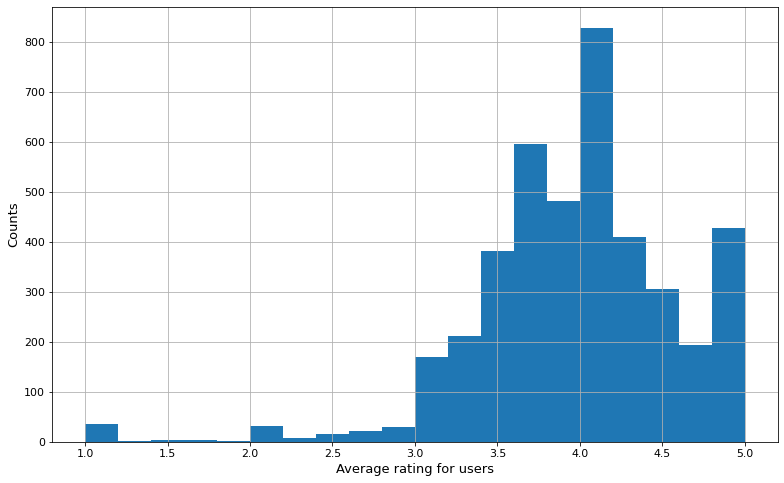

In [49]:
user_df.groupby('user_id').mean()['ratings'].hist(bins=20, figsize=(13, 8))
plt.xlabel('Average rating for users', size=13)
plt.ylabel('Counts', size=13)
plt.xticks(size=11)
plt.yticks(size=11)